# EDA on 2016 Olympics at Rio de Janeiro datasets:

## Summary

### Datasets description and link:

The two datasets used for analysis are from the 2016 Olympics at Rio de Janeiro. The first dataset "athletes" used is of 11,538 athletes, this dataset includes the name, nationality (IOC country code), gender, date of birth, height in meters, weight in kilograms, sport, and quantity of gold, silver, and/or bronze medals won. The second dataset "countries" contains information about the country name, IOC country code, population, and GDP per capita of the participating nations.

Dataset Link: https://www.kaggle.com/rio2016/olympic-games


### Process followed to import and combine the datasets:

The files were read as CSV into pandas data frames and then combined into one using merge function on the common column "IOC country code" using a left join. Pandas' pivot table function was also used to aggregate the final dataset at country and gender level for necessary analysis/visualization. 


### Analysis performed and interpretation of the results:

The analysis performed on the merged dataset and the interpretation of the results are as below:

1. Top five athletes details by no. of gold medals and medals tally plot: The top 5 players based on gold medals was found and their medal tally is plotted below. It was observed that "Michael Phelps" won the highest number of gold medals for the aquatics sports category. Two of the top five athletes are from USA and aquatic sports category.
2. Top five male and female athletes details and medals tally plots: The top 5 male and female players based on gold medals were found and their medal tally is plotted below. Two of the top five male athletes and three of the top five female athletes are from USA. "Katie Ledecky" is the top female athlete in the aquatics sports category.
3. Number of athletes participating from each country (Top 20 countries): USA, Brazil, and Germany have the highest number of participants in the 2016 Olympics.
4. Numbers of athletes participating in each sport: The highest number of athletes were in athletics followed by aquatics. 
5. Percentage of male and female athletes participating: ~45% of the total participating athletes in the 2016 Olympics were female.
6. Correlation coefficient and scatter plot of height vs. weight of all participating athletes by gender: The correlation coefficient of height vs. weight of all participating athletes is 0.76. 
7. Aggregating the data frame at the country level to do necessary analysis at the country level: The data frame was pivoted at the country level using the pivot table function of pandas.
8.Top 5 countries by total medals and medals tally plot: USA won the highest number of the total medal followed by Germany and UK.
9. Correlation coefficient and scatter plot of GDP per capita/Population vs. total medals won by a country: The correlation coefficient of 1st is 0.38 and for the 2nd is 0.32
10. Plot for medals tally of male and female athletes: The medals tally of male and female athletes by gold, silver, and bronze are plotted below.


In [1]:
# Loading all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading athletes dataset as dataframe
athletes = pd.read_csv("athletes.csv",encoding = "ISO-8859-1") 
pd.set_option('display.expand_frame_repr', False)

In [3]:
# Loading countries dataset as dataframe
countries = pd.read_csv("countries.csv",encoding = "ISO-8859-1") 

In [4]:
# Merge the above two datasets and drop the common row
athletes_countries = athletes.merge(countries, left_on='nationality', right_on = 'code', how='left').drop(columns= ['nationality'])

In [5]:
# Setting the index of the dataframe to "id" from sequential integers
athletes_countries = athletes_countries.set_index('id')

In [6]:
# Adding a new column to the dataframe which will give total number of medals (gold + silver + bronze) for each athlete
athletes_countries['total_medals'] = athletes_countries['gold'] + athletes_countries['silver']+ athletes_countries['bronze']
athletes_countries.head(n=5)

,name,sex,dob,height,weight,sport,gold,silver,bronze,country,code,population,gdp_per_capita,total_medals
id,,,,,,,,,,,,,,
736041664,A Jesus Garcia,male,10/17/69,1.72,64.0,athletics,0,0,0,Spain,ESP,46418269.0,25831.582305,0
532037425,A Lam Shin,female,9/23/86,1.68,56.0,fencing,0,0,0,"Korea, South",KOR,50617045.0,27221.524051,0
435962603,Aaron Brown,male,5/27/92,1.98,79.0,athletics,0,0,1,Canada,CAN,35851774.0,43248.529909,1
521041435,Aaron Cook,male,1/2/91,1.83,80.0,taekwondo,0,0,0,Moldova,MDA,3554150.0,1848.061804,0
33922579,Aaron Gate,male,11/26/90,1.81,71.0,cycling,0,0,0,New Zealand,NZL,4595700.0,37807.967276,0


### 1. Top five athletes details by no. of gold medals and medals tally plot:

Top 5 athletes details by number of gold medals:

                     name        country  gold  silver  bronze       sport     sex
id                                                                                
491565031  Michael Phelps  United States     5       1       0    aquatics    male
960103057   Katie Ledecky  United States     4       1       0    aquatics  female
770111957    Simone Biles  United States     4       0       1  gymnastics  female
643664378  Katinka Hosszu        Hungary     3       1       0    aquatics  female
237391684     Ryan Murphy  United States     3       0       0    aquatics    male


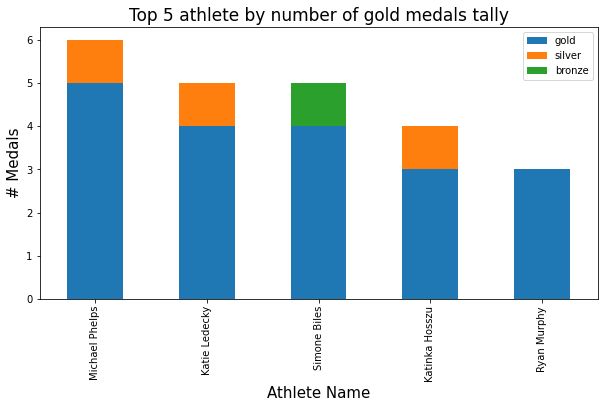

In [7]:
# Sort the dataframe by no. of gold medals and print the top 5 athletes
sorted_athlete = athletes_countries.sort_values(by=['gold'], ascending=False)
top_5_athlete = sorted_athlete[["name", "country", "gold", "silver", "bronze", "sport","sex"]].head(n=5)
print("Top 5 athletes details by number of gold medals:")
print("")
print(top_5_athlete)

# Plot a stacked bar chart for athlete medals tally
plot_1 = top_5_athlete[["name","gold", "silver", "bronze"]].plot(
            x = 'name',
            kind = 'bar',
            stacked = True,
            figsize=(10,5),
            mark_right = True)
plot_1.set_xlabel("Athlete Name",fontsize=15)
plot_1.set_ylabel("# Medals",fontsize=15)
plot_1.set_title("Top 5 athlete by number of gold medals tally",fontsize=17)
plt.show()

### 2. Top five male and female athletes details and medals tally plots:

Top 5 male athletes details by number of gold medals:

                     name         country  gold  silver  bronze      sport   sex
id                                                                              
491565031  Michael Phelps   United States     5       1       0   aquatics  male
237391684     Ryan Murphy   United States     3       0       0   aquatics  male
441111357     Jason Kenny  United Kingdom     3       0       0    cycling  male
579416064      Usain Bolt         Jamaica     3       0       0  athletics  male
841861773      Bonchan Ku    Korea, South     2       0       0    archery  male


<ipython-input-8-e0a5ef8b57f6>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_athlete_male = sorted_athlete[["name", "country", "gold", "silver", "bronze", "sport","sex"]][is_male].head(n=5)


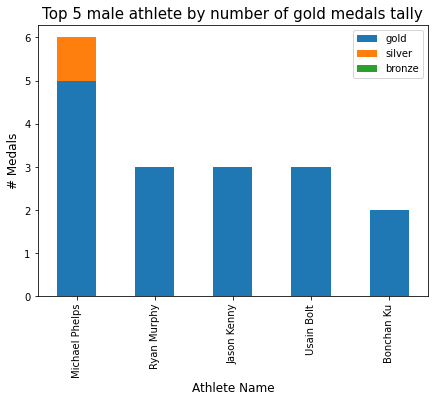

<ipython-input-8-e0a5ef8b57f6>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_5_athlete_female = sorted_athlete[["name", "country", "gold", "silver", "bronze", "sport","sex"]][is_female].head(n=5)




Top 5 female athletes details by number of gold medals:

                     name        country  gold  silver  bronze       sport     sex
id                                                                                
960103057   Katie Ledecky  United States     4       1       0    aquatics  female
770111957    Simone Biles  United States     4       0       1  gymnastics  female
643664378  Katinka Hosszu        Hungary     3       1       0    aquatics  female
552666305    Danuta Kozak        Hungary     3       0       0       canoe  female
461914120      Lilly King  United States     2       0       0    aquatics  female


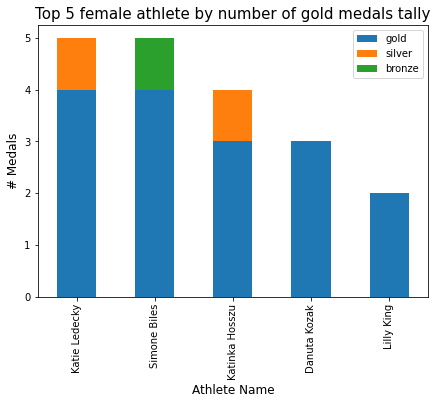

In [8]:
# Top 5 male athlete details 
is_male =  athletes_countries['sex'] == "male"
top_5_athlete_male = sorted_athlete[["name", "country", "gold", "silver", "bronze", "sport","sex"]][is_male].head(n=5)
print("Top 5 male athletes details by number of gold medals:")
print("")
print(top_5_athlete_male)

# Plot a Stacked Bar Chart for male athlete medal tally
plot_1 = top_5_athlete_male[["name","gold", "silver", "bronze"]].plot(
            x = 'name',
            kind = 'bar',
            stacked = True,
            figsize=(7,5),
            mark_right = True)
plot_1.set_xlabel("Athlete Name",fontsize=12)
plot_1.set_ylabel("# Medals",fontsize=12)
plot_1.set_title("Top 5 male athlete by number of gold medals tally",fontsize=15)
plt.show()

# Top 5 female athlete details 
is_female =  athletes_countries['sex'] == "female"
top_5_athlete_female = sorted_athlete[["name", "country", "gold", "silver", "bronze", "sport","sex"]][is_female].head(n=5)
print("")
print("")
print("Top 5 female athletes details by number of gold medals:")
print("")
print(top_5_athlete_female)

# Plot a Stacked Bar Chart for male athlete medal tally
plot_2 = top_5_athlete_female[["name","gold", "silver", "bronze"]].plot(
            x = 'name',
            kind = 'bar',
            stacked = True,
            figsize=(7,5),
            mark_right = True)
plot_2.set_xlabel("Athlete Name",fontsize=12)
plot_2.set_ylabel("# Medals",fontsize=12)
plot_2.set_title("Top 5 female athlete by number of gold medals tally",fontsize=15)
plt.show()

### 3. Number of athletes participating from each country (Top 20 countries):

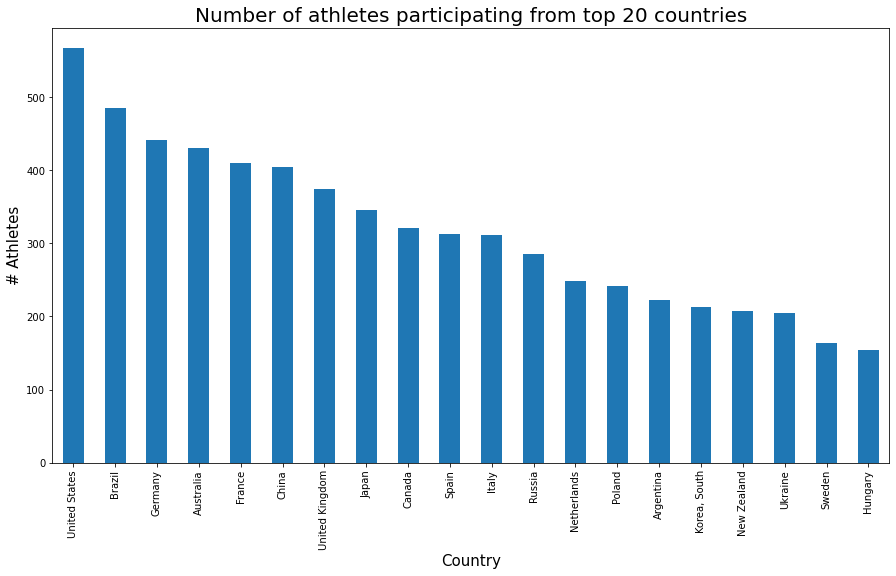

In [9]:
# Plot a bar chart to show number of athletes by countries for top 20 countries
plot_1 = athletes_countries["country"].value_counts()[:20].plot(kind='bar',
                                    figsize=(15,8))
plot_1.set_xlabel("Country",fontsize=15)
plot_1.set_ylabel("# Athletes",fontsize=15)
plot_1.set_title("Number of athletes participating from top 20 countries",fontsize=20)
plt.show()

### 4. Numbers of athletes participating in each sport:

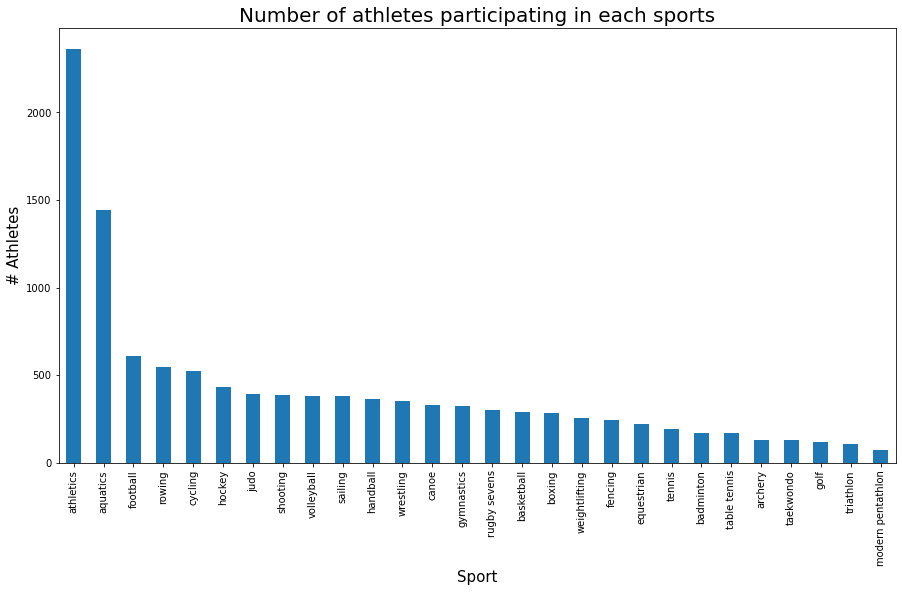

In [10]:
# Plot a bar chart to show number of athletes by sports
plot_1 = athletes_countries["sport"].value_counts().plot(kind='bar',
                                    figsize=(15,8))
plot_1.set_xlabel("Sport",fontsize=15)
plot_1.set_ylabel("# Athletes",fontsize=15)
plot_1.set_title("Number of athletes participating in each sports",fontsize=20)
plt.show()

### 5. Percentage of male and female athletes participating: 

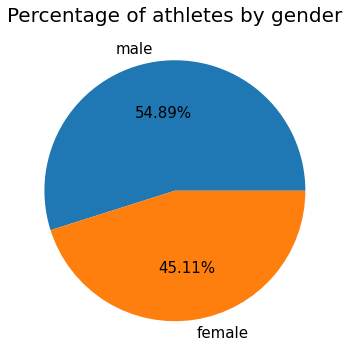

In [11]:
# Plot a pie chart to show percentage of male and female athletes 
plot_1 = athletes_countries["sex"].value_counts().plot(kind='pie',autopct="%.2f%%", fontsize=15,
                                    figsize=(10,6))
plot_1.set_title("Percentage of athletes by gender",fontsize=20)
plot_1.set_ylabel("")
plt.show()

### 6. Correlation coefficient and scatter plot of height vs. weight of all participating athletes by gender:

The correlation coefficient of height vs. weight of all participating athletes is 0.76



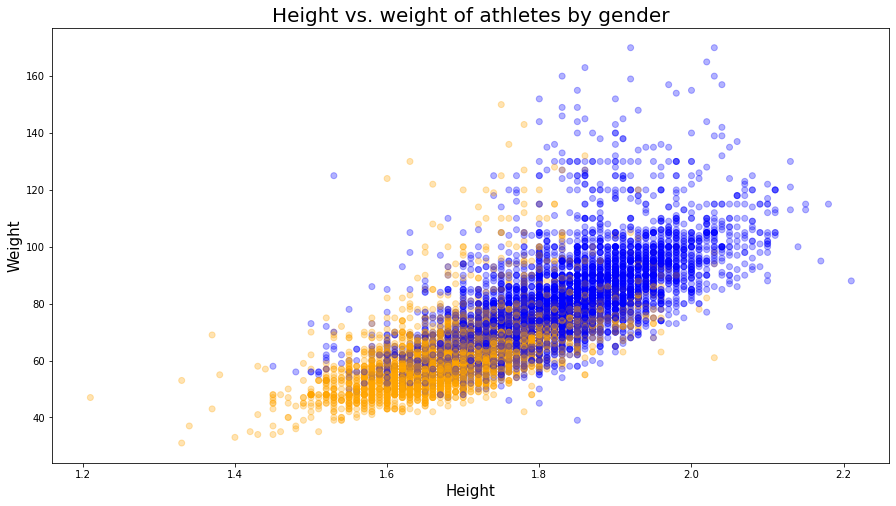

In [12]:
# Calculate correlation coefficient of height vs. weight of all participating athletes
corr = athletes_countries['height'].corr(athletes_countries['weight'])
print("The correlation coefficient of height vs. weight of all participating athletes is " + str(round(corr,2)))
print("")

# Plot a Scatter Plot of height vs. weight of all participating athletes by gender
fig, plot_1 = plt.subplots(figsize=(15, 8))

colors = {'male':'blue', 'female':'orange'}

plot_1.scatter(athletes_countries['height'], athletes_countries['weight'], c=athletes_countries['sex'].map(colors), alpha=0.3)

plot_1.set_xlabel("Height",fontsize=15)
plot_1.set_ylabel("Weight",fontsize=15)
plot_1.set_title("Height vs. weight of athletes by gender",fontsize=20) 

plt.show()

### 7. Aggregating the data frame at country level to do necessary analysis at country level:

In [13]:
# Aggregate the dataframe at country level using pivot_table function of pandas
country_aggregated = pd.pivot_table(athletes_countries, values=['gold', 'silver', 'bronze', 'population', 'gdp_per_capita','name','total_medals'], 
                                    index=['country','code'],
                                    aggfunc={'gold': np.sum, 'silver': np.sum, 'bronze': np.sum, 'population': np.mean, 'gdp_per_capita': np.mean, 'name': np.count_nonzero, 'total_medals': np.sum})

#change the column "name" to "No. of athletes" which is more meaningful
country_aggregated = country_aggregated.rename(columns = {'name':'no_of_athletes'})

#change the index column to only code
country_aggregated.reset_index(inplace=True)
country_aggregated = country_aggregated.set_index('code')

#checking the top 5 rows by number of gold medals
print(country_aggregated.sort_values(by=['gold'], ascending=False).head(5))

             country  bronze  gdp_per_capita  gold  no_of_athletes    population  silver  total_medals
code                                                                                                  
USA    United States      71    56115.718426   139             567  3.214188e+08      54           264
GBR   United Kingdom      26    43875.969614    64             374  6.513823e+07      55           145
RUS           Russia      34     9092.580536    52             286  1.440968e+08      29           115
GER          Germany      67    41313.313995    49             441  8.141314e+07      44           160
CHN            China      37     8027.683810    46             404  1.371220e+09      30           113


### 8.Top 5 countries by total medals and medals tally plot:

Top 5 countries by total medals details:
             country  total_medals  gold  silver  bronze  no_of_athletes
code                                                                    
USA    United States           264   139      54      71             567
GER          Germany           160    49      44      67             441
GBR   United Kingdom           145    64      55      26             374
RUS           Russia           115    52      29      34             286
CHN            China           113    46      30      37             404


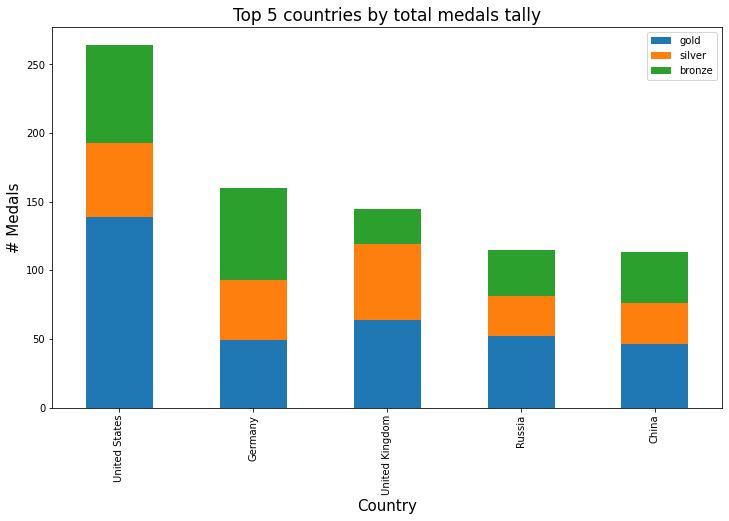

In [14]:
# Getting the top 5 countries details based on total number of medals
top_5_countries = country_aggregated.sort_values(by=['total_medals'], ascending=False).head(5)
print("Top 5 countries by total medals details:")
print(top_5_countries[['country','total_medals', 'gold', 'silver', 'bronze','no_of_athletes']])

# Plot a Stacked Bar Chart for athlete medal tally
plot_1 = top_5_countries[["country","gold", "silver", "bronze"]].plot(
            x = 'country',
            kind = 'bar',
            stacked = True,
            figsize=(12,7))
plot_1.set_xlabel("Country",fontsize=15)
plot_1.set_ylabel("# Medals",fontsize=15)
plot_1.set_title("Top 5 countries by total medals tally",fontsize=17)
plt.show()

### 9. Correlation coefficient and scatter plot of GDP per capita/Population vs. total medals won by a country:

The correlation coefficient of GDP per capita vs total medals won by a country is 0.38



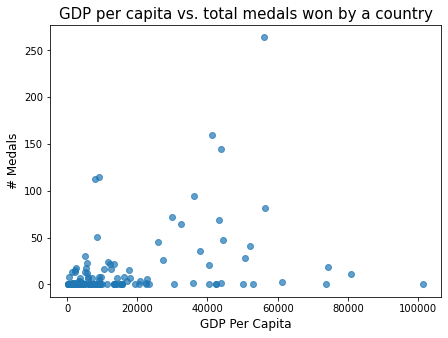


The correlation coefficient of population vs. total medals won by a country is 0.32



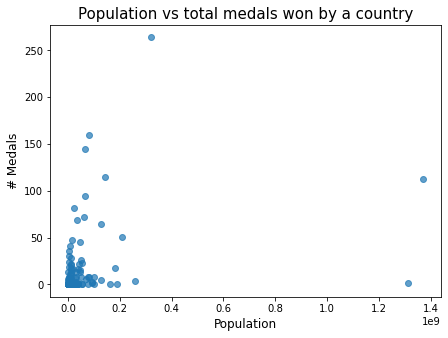

In [15]:
# Calculate correlation coefficient of GDP per capita vs. total medals won by a country
corr = country_aggregated['gdp_per_capita'].corr(country_aggregated['total_medals'])
print("The correlation coefficient of GDP per capita vs total medals won by a country is " + str(round(corr,2)))
print("")

# Plot a Scatter Plot of GDP per Capita vs. total medals won by a country
fig, plot_1 = plt.subplots(figsize=(7, 5))

plot_1.scatter(country_aggregated['gdp_per_capita'], country_aggregated['total_medals'], alpha=0.7)

plot_1.set_xlabel("GDP Per Capita",fontsize=12)
plot_1.set_ylabel("# Medals",fontsize=12)
plot_1.set_title("GDP per capita vs. total medals won by a country",fontsize=15) 

plt.show()

# Calculate correlation coefficient of population vs. total medals won by a country
corr = country_aggregated['population'].corr(country_aggregated['total_medals'])
print("")
print("The correlation coefficient of population vs. total medals won by a country is " + str(round(corr,2)))
print("")

# Plot a Scatter Plot of population vs. total medals won by a country
fig, plot_2 = plt.subplots(figsize=(7, 5))

plot_2.scatter(country_aggregated['population'], country_aggregated['total_medals'], alpha=0.7)

plot_2.set_xlabel("Population",fontsize=12)
plot_2.set_ylabel("# Medals",fontsize=12)
plot_2.set_title("Population vs total medals won by a country",fontsize=15) 

plt.show()

### 10. Plot for medals tally of male and female athletes:

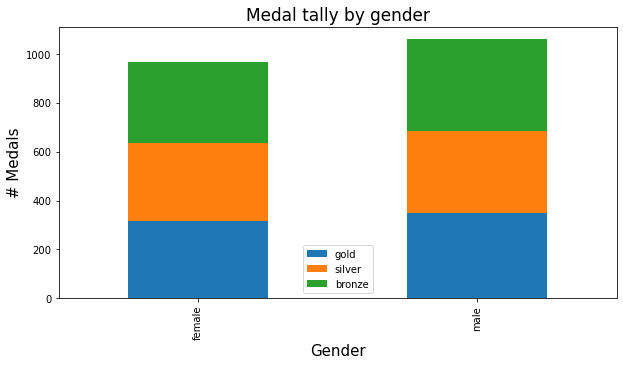

In [16]:
# Aggregate the dataframe at gender level using pivot_table function of pandas
gender_aggregated = pd.pivot_table(athletes_countries, values=['gold', 'silver', 'bronze','total_medals','name'], 
                                    index=['sex'],
                                    aggfunc={'gold': np.sum, 'silver': np.sum, 'bronze': np.sum, 'total_medals': np.sum, 'name': np.count_nonzero})

#change the column "name" to as "No. of athletes" which is more meaningful
gender_aggregated = gender_aggregated.rename(columns = {'name':'no_of_athletes'})

#change the index column to default
gender_aggregated.reset_index(inplace=True)

# Plot a Stacked Bar Chart for athlete medal tally
plot_1 = gender_aggregated[["sex","gold", "silver", "bronze"]].plot(
            x = 'sex',
            kind = 'bar',
            stacked = True,
            figsize=(10,5),
            mark_right = True)
plot_1.set_xlabel("Gender",fontsize=15)
plot_1.set_ylabel("# Medals",fontsize=15)
plot_1.set_title("Medal tally by gender",fontsize=17)
plt.show()